# Simulation Problem 8
## ML HW_4

#### import libraries, load dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("../data/Ted/ted_main.csv")
X = data['duration'].to_numpy()
del data

#### parzen Window Etimation

In [23]:
class parzen:
    def __init__(self, x, h, kernel):
        self.h = h
        self.x = x
        self.n = x.shape[0]
        self.kernel = kernel
        pass

    def hypercube_kernel(self, x, unit_len = 1):
        ## Simple Kernel Function (just for test)
        return np.ones(x.shape[0]) - np.max(np.array(np.abs(x) < 0.5 * unit_len * np.ones(x.shape), dtype=np.int16), axis=1)

    def gaussian_kernel(self, x):
        ## Gaussian Kernel Function (mu = 0, sigma = I)
        d = x.shape[1]
        return np.exp(-0.5 * np.power(x,2)) / np.sqrt(2 * np.pi)


    def prob(self, x):
        probs = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            if self.kernel == "cube":
                probs[i] = np.sum(self.gaussian_kernel((x[i] - self.x) / self.h)) / (self.h * self.n)
            elif self.kernel == "gaussian":
                probs[i] = np.sum(self.gaussian_kernel((x[i] - self.x) / self.h)) / (self.h * self.n)
        return probs

    def plot_dist(self):
        points = np.linspace(np.min(self.x),np.max(self.x),5000)
        p = sns.displot(self.x, stat="density", color="green", aspect=1.5)
        p = sns.lineplot(points, self.prob(points), color="red")
        p.set_xlabel("Duration", fontsize = 15)
        p.set_ylabel("Probability", fontsize = 15)
        plt.title("Parzen Window Estimation (h="+str(self.h)+")", fontsize=20)
        plt.legend(labels=["Predicted", "Actual"])
        plt.show()

#### A

/home/kassra/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


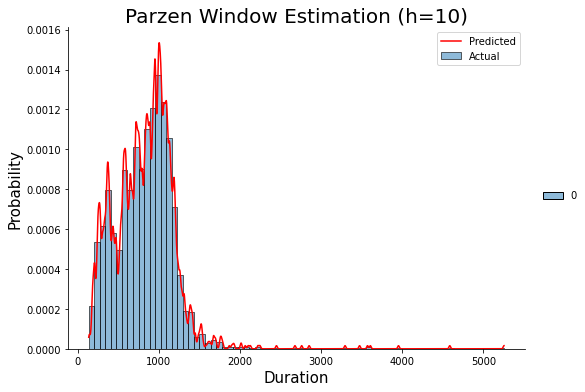

In [24]:
classifier = parzen(X.reshape(-1,1), 10, "gaussian")
classifier.plot_dist()

#### B

/home/kassra/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


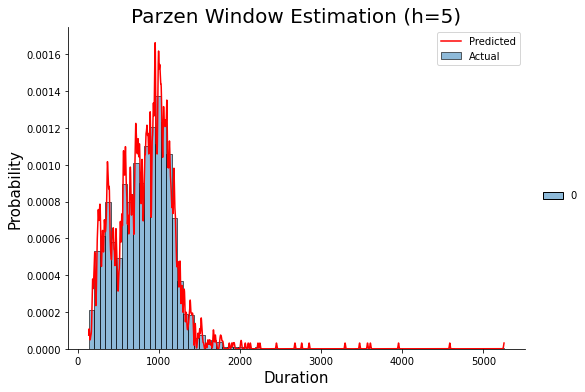

/home/kassra/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


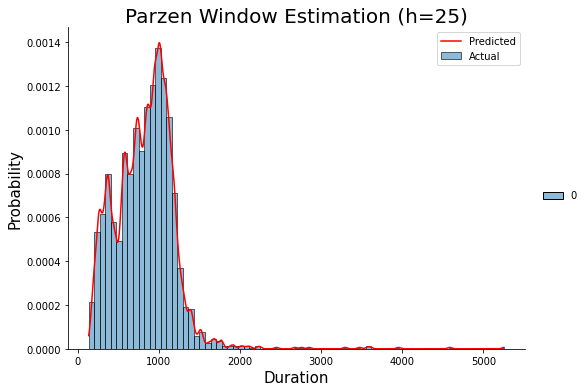

/home/kassra/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


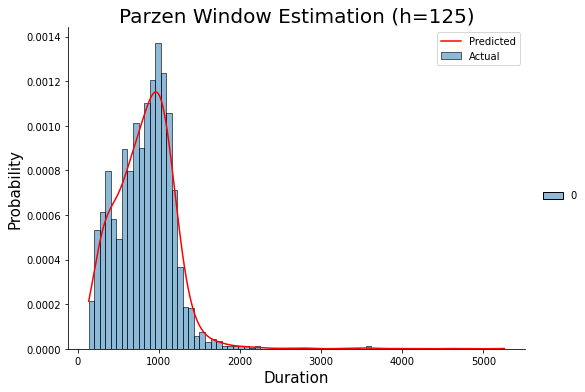

In [25]:
classifier = parzen(X.reshape(-1,1), 5, "gaussian")
classifier.plot_dist()
classifier = parzen(X.reshape(-1,1), 25, "gaussian")
classifier.plot_dist()
classifier = parzen(X.reshape(-1,1), 125, "gaussian")
classifier.plot_dist()

#### C

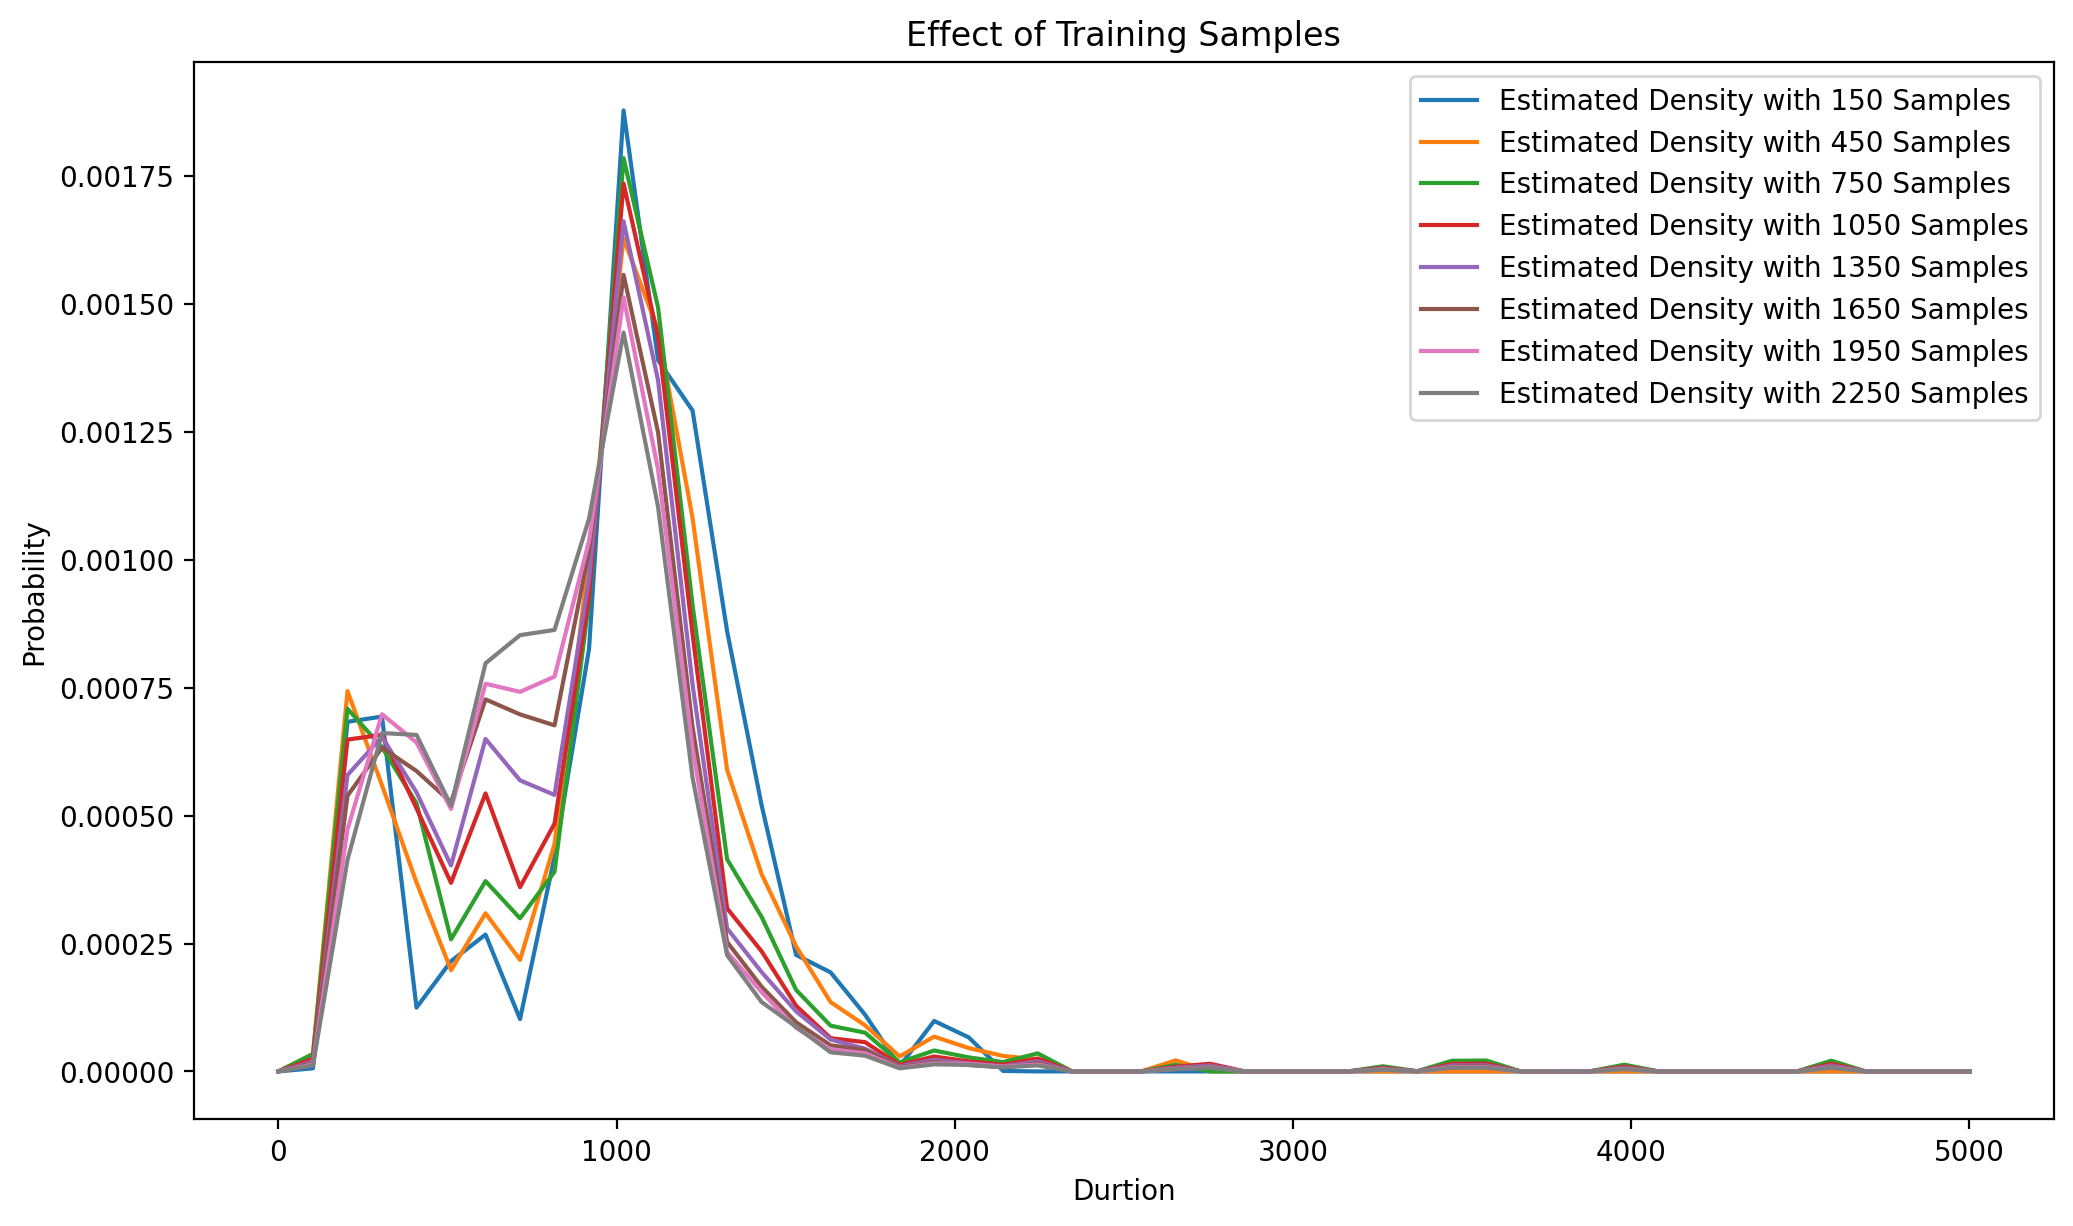

In [38]:
points = np.linspace(0, 5000)
plt.figure(figsize = (12,7))

for n in range(150,2550,150*2):
    classifier = parzen(X[:n].reshape(-1,1), 25, "gaussian")
    probs = classifier.prob(points)
    plt.plot(points, probs, label="Estimated Density with "+str(n) + " Samples")



plt.xlabel("Duration")
plt.ylabel("Probability")
plt.title("Effect of Training Samples")
plt.legend()
plt.gcf().set_dpi(200)
plt.show()

#### D (sickit learn)

/home/kassra/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


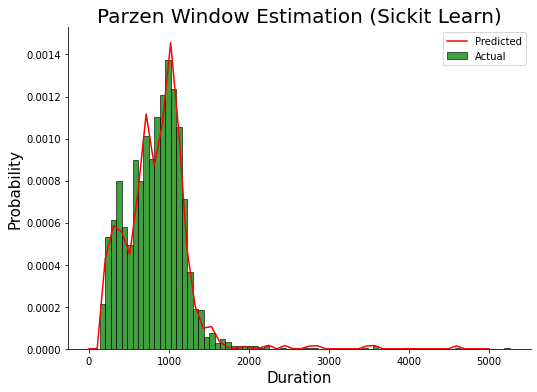

In [16]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

model = KernelDensity(kernel = 'gaussian', bandwidth=10)
model.fit(X.reshape(-1,1))

points = np.linspace(0, 5000)
predict = model.score_samples(points.reshape(-1,1))

sns.displot(X, stat="density", color="green", aspect=1.5)
p = sns.lineplot(points, np.exp(predict), color="red")
p.set_xlabel("Duration", fontsize = 15)
p.set_ylabel("Probability", fontsize = 15)
plt.title("Parzen Window Estimation (Sickit Learn)", fontsize=20)
plt.legend(labels=["Predicted", "Actual"])
plt.show()